<a href="https://colab.research.google.com/github/juliannadesalle/ECGR-5106-Real-Time-Machine-Learning/blob/main/Homework_0_Problem_1_Coffee_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from torchvision import models

In [17]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [18]:
alexnet = models.AlexNet()

In [19]:
resnet = models.resnet101(pretrained=True)

In [20]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [22]:
from PIL import Image
img = Image.open("Images/coffee.jpg")

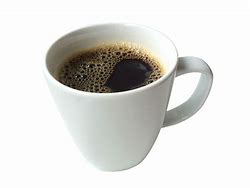

In [23]:
img

In [24]:
img_t = preprocess(img)

In [25]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [26]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [27]:
out = resnet(batch_t)
out

tensor([[ 2.0309e-01, -6.4158e-01, -1.6011e+00, -2.1903e+00, -3.9689e+00,
          1.3926e+00, -3.2622e+00, -2.4302e+00, -2.3689e+00, -9.3796e-01,
          2.8975e+00,  7.6293e-02, -7.0907e-01, -4.1007e-01, -1.1662e+00,
         -7.5634e-01, -8.6283e-02, -2.4464e+00, -2.9366e+00, -6.6507e-01,
         -1.3895e+00, -1.3908e+00, -1.9356e-01, -2.5671e+00, -3.0701e+00,
         -3.1276e+00, -1.0403e+00, -1.1356e+00, -9.3900e-01,  6.2693e-01,
         -3.6405e+00, -2.7662e+00, -1.7788e+00, -2.0697e+00, -1.0876e-01,
         -2.6500e+00,  1.5606e-01, -2.6567e+00, -1.3160e-01, -1.8433e+00,
         -2.1053e+00, -1.7080e+00, -2.7103e+00, -5.2518e-01, -1.3111e+00,
         -3.4546e-01, -3.5678e+00, -1.9111e+00, -1.8568e+00, -1.7499e+00,
         -4.1534e+00, -1.2434e+00, -5.4328e-01, -6.5032e-01, -1.0386e+00,
         -3.4618e+00, -1.1762e+00, -3.7131e+00, -2.9537e+00,  2.7703e-01,
         -9.3515e-01, -9.8881e-01, -1.4662e+00,  1.4777e+00, -2.8756e+00,
         -1.2645e+00,  5.6423e-01, -2.

In [28]:
with open('Images/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [29]:
_, index = torch.max(out, 1)

In [30]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('espresso', 43.86978530883789)

In [31]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('espresso', 43.86978530883789),
 ('coffee mug', 34.64975357055664),
 ('cup', 11.275355339050293),
 ('espresso maker', 7.963995456695557),
 ('eggnog', 0.7754254341125488)]